**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
suppressMessages(suppressWarnings(library("pheatmap")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2"
)
txt_fname = "results.enrich.fcc_active_vs_inactive.perm_n10k.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_fit_summary = dat
print(dim(dat))
head(dat)

[1] 2084    6


Group,Feature,Stat,Pval,Score,Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Enhancer,H2AFZ,35.764202,0.0000,1.6208491,0.000000000
Enhancer,H3K27ac,28.537164,0.0000,1.1127810,0.000000000
Enhancer,H3K27me3,-2.765306,0.0049,-1.0878141,0.005574017
Enhancer,H3K36me3,-14.052677,0.0000,-1.8813276,0.000000000
Enhancer,H3K4me1,22.520019,0.0000,0.6897697,0.000000000
Enhancer,H3K4me2,28.681501,0.0000,1.1229281,0.000000000


In [3]:
vec_txt_feature_subset = c(
    "CTCF", "SMC3", "RAD21", "POLR2A", "EP300", "EZH2", "REST", "SIN3A",
    'H3K27ac', 'H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K27me3')

In [4]:
dat = dat_fit_summary

dat = dat %>% dplyr::filter(Feature %in% vec_txt_feature_subset)

dat_fit_summary_subset = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 52  6


Group,Feature,Stat,Pval,Score,Padj
Enhancer,H3K27ac,28.537164,0.0000,1.1127810,0.0000000
Enhancer,H3K27me3,-2.765306,0.0049,-1.0878141,0.0055740
Enhancer,H3K4me1,22.520019,0.0000,0.6897697,0.0000000
Enhancer,H3K4me2,28.681501,0.0000,1.1229281,0.0000000
Enhancer,H3K4me3,0.752021,0.4564,-0.8405425,0.4690028
Enhancer,CTCF,-21.421628,0.0000,-2.3993723,0.0000000


In [5]:
dat = dat_fit_summary_subset

dat = dat %>% 
    dplyr::select(Group, Feature, Score) %>% 
    tidyr::spread(Feature, Score) %>%
    column_to_rownames("Group")

vec = vec_txt_feature_subset
dat = dat[, vec]

mat_fit_summary_subset = dat
print(dim(dat))
fun_display_table(dat)

[1]  4 13


,CTCF,SMC3,RAD21,POLR2A,EP300,EZH2,REST,SIN3A,H3K27ac,H3K4me1,H3K4me2,H3K4me3,H3K27me3
Enhancer,-2.3993723,-2.0980495,-1.9986229,-0.362059,1.8750733,-0.4037329,-0.2274237,-1.874327,1.112781,0.6897697,1.122928,-0.8405425,-1.0878141
Silencer,0.0290066,0.5756118,0.3375224,-1.423334,-0.9035866,0.3486219,4.3819975,1.654569,-4.227456,-0.8432563,-2.727380,-2.4349523,-0.3809046
TSS:Enhancer,-1.2215719,-1.5262054,-1.8680434,2.355961,-1.3960104,-1.2718337,-0.3598190,1.872691,2.233332,-2.9261141,2.902934,3.3009339,-1.2851742
TSS:Silencer,-1.3872070,-1.8077328,-0.6111721,1.171923,-1.7424403,-0.8536684,1.4861948,1.183973,0.516174,0.5085489,1.456274,2.2579237,-0.8812137


In [6]:
dat = dat_fit_summary
summary(dat$Score)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.22746 -0.65614 -0.01812  0.00000  0.59893  4.38200 

In [7]:
dat = dat_fit_summary_subset
summary(dat$Score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-4.2275 -1.4028 -0.3923 -0.1922  1.1352  4.3820 

In [8]:
vec_num_breaks = seq(-3, 3, by = 0.1)

vec = brewer.pal(n = 7, name = "RdBu")
vec = colorRampPalette(rev(vec))(length(vec_num_breaks))
vec_txt_colors = vec

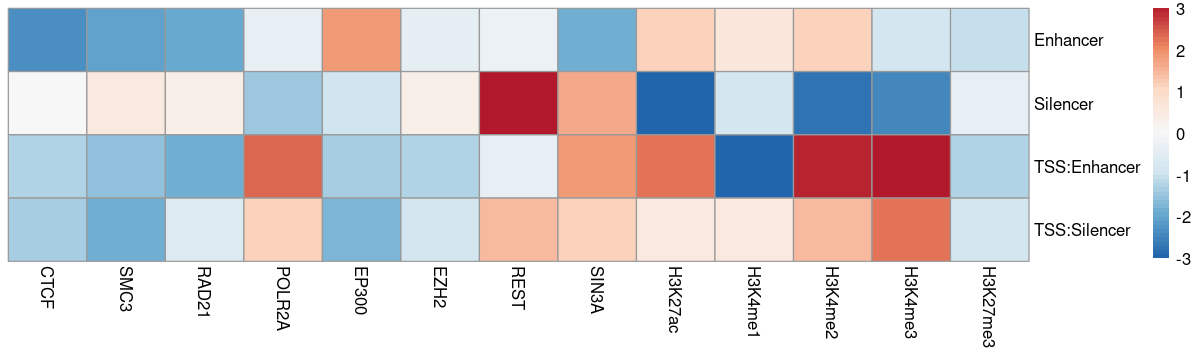

In [9]:
options(repr.plot.height = 3, repr.plot.width=10)

dat = mat_fit_summary_subset
pheatmap(
    dat,
    color  = vec_txt_colors,
    breaks = vec_num_breaks,
    cluster_rows = FALSE,
    cluster_cols = FALSE
)

In [11]:
vec_txt_region_group = c(
    "Enhancer", "TSS:Enhancer", "Silencer", "TSS:Silencer"
)

In [12]:
vec_txt_feature_subset = c(
    "CTCF", "SMC3", "POLR2A", "EP300", "REST",
    'H3K27ac', 'H3K4me1', 'H3K4me3')

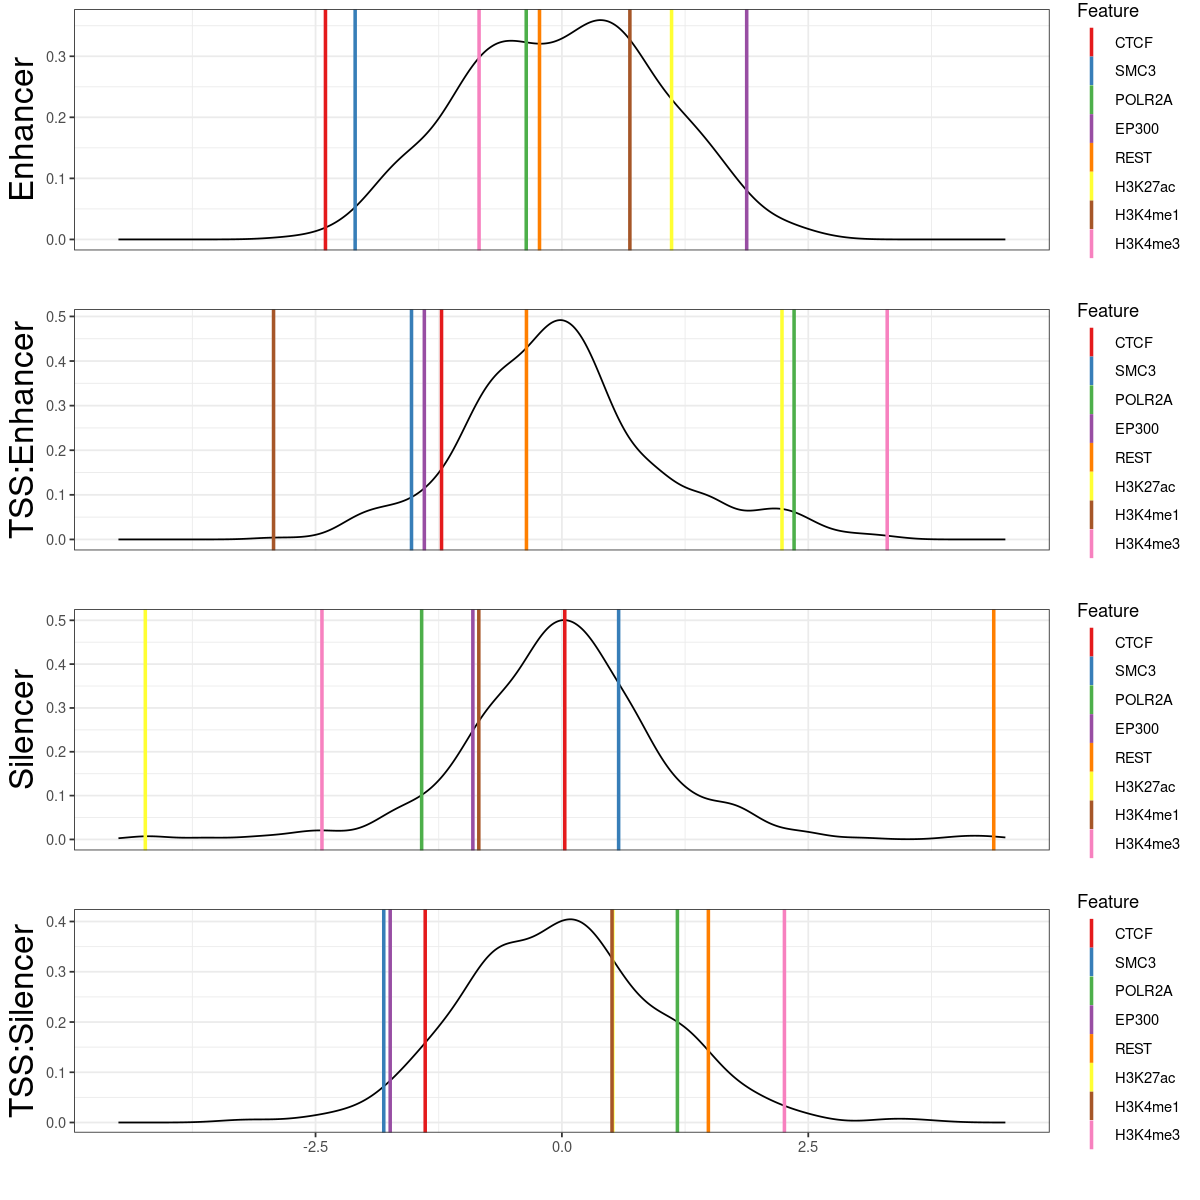

In [28]:
### split
dat = dat_fit_summary
lst = split(dat, dat$Group)

### reorder
lst = lst[vec_txt_region_group]

### generate plot
lst = lapply(names(lst), function(idx){
    dat = lst[[idx]]
    
    tmp = dat %>% dplyr::filter(Feature %in% vec_txt_feature_subset)
    tmp = tmp %>% dplyr::mutate(Feature = factor(Feature, levels=vec_txt_feature_subset))
    vec = tmp$Score
    
    gpt = ggplot() + 
        geom_density(data = dat, aes(x=Score)) +
        geom_vline(  data = tmp, aes(xintercept = Score, color = Feature), linewidth=1) +
        scale_colour_brewer(palette = "Set1") +
        labs(x = "", y = idx) +
        xlim(-4.5, 4.5) +
        theme_bw()
    return(gpt)
})

### adjust style
lst = lapply(lst, function(gpt){
    gpt = gpt + theme(axis.title   = element_text(size = 20))
    return(gpt)
})

### remove the label except for the most bottom one
lst[1:3] = lapply(lst[1:3], function(gpt){
    gpt = gpt + theme(
        axis.text.x  = element_blank(),
        axis.ticks.x = element_blank(),
        
    )
    return(gpt)
})

### assign and show
lst_gpt = lst

options(repr.plot.height = 10, repr.plot.width=10)
plot_grid(plotlist = lst_gpt, ncol = 1)